In [44]:
#!/usr/bin/env python
# Name: ex1_1.py
import numpy as np
import sys
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import matplotlib.pyplot as plt

def disp(infile, bandnumber):
    gdal.AllRegister()
    inDataset = gdal.Open(infile, GA_ReadOnly)
    cols = inDataset.RasterXSize
    rows = inDataset.RasterYSize
    bands = inDataset.RasterCount

    image = np.zeros((bands, rows, cols))
    for b in range(bands):
        band = inDataset.GetRasterBand(b + 1)
        image[b, :, :] = band.ReadAsArray(0, 0, cols, rows)
    inDataset = None

    # Display NIR band
    band = image[bandnumber - 1, :, :]
    mn = np.amin(band)
    mx = np.amax(band)
    plt.imshow((band - mn) / (mx - mn), cmap='gray')
    plt.show()

if __name__ == '__main__':
    infile = sys.argv[1]
    bandnumber = int(sys.argv[2])
    disp(infile, bandnumber)


ValueError: invalid literal for int() with base 10: 'C:\\Users\\Acer ES 14\\AppData\\Roaming\\jupyter\\runtime\\kernel-5d35ecc8-27e3-4539-8702-5155195049ae.json'

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('GeoTiff_Image.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [47]:
import numpy as np
b = np . mat ([1 ,2 ,3])
# an almost singular matrix
A = b .T*b + np . random . rand (3 ,3)*0.001
# a symmetric almost singular matrix
A = A + A.T
pr int  ' determinant : %f '% np . linalg . det (A)
# singular value decomposition
U , Lambda ,V = np . linalg . svd (A)
pr int  'Lambda = % s '% s tr ( Lambda )
pr int 'U = %s '% s tr (U)
pr int 'V = %s'% s tr (V)

SyntaxError: invalid syntax (1404725326.py, line 7)

In [2]:
import IPython . display as disp
import ee
ee . Initialize ()
minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95
rect = ee . Geometry . Rectangle ([ minlon , minlat , maxlon , maxlat ])
collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(rect)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)
image = ee . Image ( collection . first ()). clip ( rect )
url = image . select ('VV'). getThumbURL ({  'min': -20 , 'max':0})
disp . Image ( url = url )

In [3]:
import numpy

X = numpy.mat([[1], [2]])
A = numpy.mat([[1, 2], [3, 4]])

print(A)
print(A * X)


[[1 2]
 [3 4]]
[[ 5]
 [11]]


In [4]:
pr int numpy . linalg . det (A) # determinant
pr int A.I # shorthand for inverse
pr int A.I*A # yields identity matrix

SyntaxError: invalid syntax (2393836658.py, line 1)

In [5]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np

gdal.AllRegister()

infile = 'imagery/AST_20070501'
inDataset = gdal.Open(infile, GA_ReadOnly)
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize

# data matrix
G = np.zeros((rows * cols, 3))
k = 0

for b in range(3):
    band = inDataset.GetRasterBand(b + 1)
    tmp = band.ReadAsArray(0, 0, cols, rows).ravel()
    G[:, b] = tmp - np.mean(tmp)

# covariance matrix
C = np.mat(G).T * np.mat(G) / (cols * rows - 1)

print(C)


AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [6]:
eigenvalues , eigenvectors = np . linalg . eigh (C)
pr int eigenvalues
pr int eigenvectors

SyntaxError: invalid syntax (376485725.py, line 2)

In [7]:
from scipy.stats import norm, chi2
import numpy as np

def x2(a, m):
    return chi2.ppf(1 - a, m)

m = 1000
a = 0.05
g = np.random.random(m)
gbar = np.sum(g) / m
s = np.sum((g - gbar) ** 2) / (m - 1)
print('sample variance: %f' % s)

lower = (m - 1) * s / x2(a / 2, m - 1)
upper = (m - 1) * s / x2(1 - a / 2, m - 1)
print('%i percent confidence interval: (%f, %f)' % (int((1 - a) * 100), lower, upper))
print('sample mean: %f' % gbar)

t = norm.ppf(1 - a / 2)
sigma = np.sqrt(s)
lower = gbar - t * sigma / np.sqrt(m)
upper = gbar + t * sigma / np.sqrt(m)
print('%i percent confidence interval: (%f, %f)' % (int((1 - a) * 100), lower, upper))


sample variance: 0.082978
95 percent confidence interval: (0.076156, 0.090764)
sample mean: 0.496705
95 percent confidence interval: (0.478851, 0.514559)


In [48]:
import IPython.display as disp
import ee

ee.Initialize()

# Path atau URL file gambar
image_path = r'C:\Users\Acer ES 14\Downloads\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg'

# Buat objek Image dari file gambar
image = ee.Image.loadGeoTIFF(image_path)

minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95

rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Atur proyeksi sesuai kebutuhan Anda
image = image.set('projection', 'EPSG:4326')

# Clip image ke area yang diinginkan
image = image.clip(rect)

# Dapatkan URL gambar thumb
url = image.select(['band_name']).getThumbURL({'min': 0, 'max': 255})

# Tampilkan gambar
disp.Image(url=url)


EEException: Image.loadGeoTIFF: Invalid GCS URL: "C:\Users\Acer ES 14\Downloads\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg". Expected something of the form "gs://bucket/path/to/object".

C:\Users\Acer ES 14\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


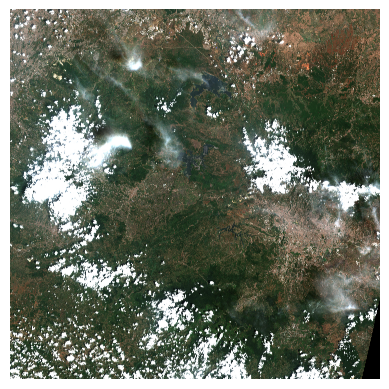

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path file gambar
image_path = r'C:\Users\Acer ES 14\Downloads\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg'

# Baca gambar
img = mpimg.imread(image_path)

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()


In [9]:
from PIL import Image

# Path file gambar
image_path = r'C:\Users\Acer ES 14\Downloads\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354.SAFE\S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg'

# Buka gambar dengan Pillow
img = Image.open(image_path)

# Tentukan batas koordinat untuk subset (misalnya, 1000x1000 piksel di sudut kiri atas)
left, top, right, bottom = 0, 0, 1000, 1000

# Ambil subset dari gambar
img_subset = img.crop((left, top, right, bottom))

# Tampilkan gambar subset
img_subset.show()


In [10]:
import ee
ee.Authenticate()
ee.Initialize()
print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())

Enter verification code: 4/1AfJohXk-V8JCasUMqzdlqjeDGst4G2KRlVx4NaM7OnqT6NokOVi275A0uVM

Successfully saved authorization token.
NASADEM: NASA NASADEM Digital Elevation 30m


In [11]:
import IPython.display as disp
import ee

ee.Initialize()

# Path atau URL file gambar
image_path = 'path/to/S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg'

# Buat objek Image dari file gambar
image = ee.Image.loadGeoTIFF(image_path)

minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95

rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Atur proyeksi sesuai kebutuhan Anda
image = image.set('projection', 'EPSG:4326')

# Clip image ke area yang diinginkan
image = image.clip(rect)

# Dapatkan URL gambar thumb
url = image.select(['band_name']).getThumbURL({'min': 0, 'max': 255})

# Tampilkan gambar
disp.Image(url=url)


EEException: Image.loadGeoTIFF: Invalid GCS URL: "path/to/S2A_MSIL2A_20231120T030021_N0509_R032_T48MYT_20231120T062354-ql.jpg". Expected something of the form "gs://bucket/path/to/object".

In [12]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Filter koleksi Sentinel-1 untuk wilayah Cianjur
cianjur_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(cianjur_rect)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
cianjur_image = ee.Image(cianjur_collection.first()).clip(cianjur_rect)

# Dapatkan URL gambar thumb untuk saluran 'VV'
url = cianjur_image.select('VV').getThumbURL({'min': -20, 'max': 0})

# Tampilkan gambar
disp.Image(url=url)


In [13]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah yang diberikan
lat, lon = -6.8560804956269505, 107.13263755641152
buffer_size = 0.05  # Buffer size in degrees, adjust as needed

minlon, minlat, maxlon, maxlat = lon - buffer_size, lat - buffer_size, lon + buffer_size, lat + buffer_size
custom_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Filter koleksi Sentinel-1 untuk wilayah yang diberikan
custom_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(custom_rect)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
custom_image = ee.Image(custom_collection.first()).clip(custom_rect)

# Dapatkan URL gambar thumb untuk saluran 'VV'
url = custom_image.select('VV').getThumbURL({'min': -20, 'max': 0})

# Tampilkan gambar
disp.Image(url=url)

In [ ]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah yang diberikan
lat, lon = -6.8560804956269505, 107.13263755641152
buffer_size = 0.05  # Buffer size in degrees, adjust as needed

minlon, minlat, maxlon, maxlat = lon - buffer_size, lat - buffer_size, lon + buffer_size, lat + buffer_size
custom_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Ambil koleksi Sentinel-1 untuk wilayah yang diberikan (tanpa filter)
custom_collection = ee.ImageCollection('COPERNICUS/S1_GRD').filterBounds(custom_rect)

# Ambil gambar pertama dari koleksi
custom_image = ee.Image(custom_collection.first()).clip(custom_rect)

# Dapatkan URL gambar thumb untuk saluran 'VV'
url = custom_image.select('VV').getThumbURL({'min': -20, 'max': 0})

# Tampilkan gambar
disp.Image(url=url)


In [ ]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah yang diberikan
lat, lon = -6.8560804956269505, 107.13263755641152
buffer_size = 0.05  # Buffer size in degrees, adjust as needed

minlon, minlat, maxlon, maxlat = lon - buffer_size, lat - buffer_size, lon + buffer_size, lat + buffer_size
custom_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Ambil koleksi ASTER Level 1T
aster_collection = ee.ImageCollection('ASTER/AST_L1T_003').filterBounds(custom_rect)

# Ambil gambar pertama dari koleksi
aster_image = ee.Image(aster_collection.first()).clip(custom_rect)

# Visualisasi True Color
url_true_color = aster_image.visualize(bands=['B3N', 'B2', 'B1'], min=0, max=255).getThumbURL({'dimensions': 1000, 'format': 'jpg'})

# Tampilkan gambar True Color
disp.Image(url=url_true_color)


In [14]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-1 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Dapatkan URL gambar thumb untuk saluran 'VV'
url = tpa_pasir_sembung_image.select('VV').getThumbURL({'min': -20, 'max': 0})

# Tampilkan gambar
disp.Image(url=url)


In [16]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-1 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Hitung rasio RGB (VV/VH)
ratio_image = tpa_pasir_sembung_image.select('VV').divide(tpa_pasir_sembung_image.select('VH'))

# Tentukan batas rasio (sesuaikan sesuai kebutuhan)
ratio_threshold = 1.2

# Filter gambar berdasarkan rasio
filtered_image = ratio_image.gte(ratio_threshold)

# Dapatkan URL gambar thumb
url = filtered_image.getThumbURL({'min': 0, 'max': 1, 'palette': 'FF0000'})

# Tampilkan gambar
disp.Image(url=url)


In [17]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-1 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi dengan palet warna tertentu (misalnya, viridis)
url = tpa_pasir_sembung_image.visualize(min=-20, max=0, palette=['#440154', '#482475', '#3E4A89', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DE2C', '#FDE725']).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


EEException: Image.visualize: Cannot provide a palette when visualizing more than one band.

In [18]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-1 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi dengan palet warna tertentu (misalnya, viridis)
url = tpa_pasir_sembung_image.select('VV').visualize(min=-20, max=0, palette=['#440154', '#482475', '#3E4A89', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DE2C', '#FDE725']).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [24]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-1 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV', 'VH']))
    .filter(ee.Filter.eq('resolution_meters', 10))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Hitung rasio VV/VH
vv_vh_ratio = tpa_pasir_sembung_image.select('VV').divide(tpa_pasir_sembung_image.select('VH'))

# Tambahkan rasio VV/VH sebagai band baru
tpa_pasir_sembung_image = tpa_pasir_sembung_image.addBands(vv_vh_ratio.rename('VV_divided_by_VH'))

# Visualisasi dengan warna menggunakan saluran 'VV', 'VH', dan 'VV/VH'
url = tpa_pasir_sembung_image.visualize(
    bands=['VV', 'VH', 'VV_divided_by_VH'],
    min=[-20, -25, 0],
    max=[0, 5, 5]
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [25]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-2 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi dengan warna menggunakan saluran RGB
url = tpa_pasir_sembung_image.visualize(
    bands=['B4', 'B3', 'B2'],  # Saluran Red, Green, dan Blue
    min=0,
    max=3000
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [27]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-2 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Filter berdasarkan persentase awan
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi dengan warna menggunakan saluran RGB
url = tpa_pasir_sembung_image.visualize(
    bands=['B4', 'B3', 'B2'],  # Saluran Red, Green, dan Blue
    min=0,
    max=3000
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [30]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-2 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi dengan warna menggunakan saluran False Color (B8, B4, B3)
url = tpa_pasir_sembung_image.visualize(
    bands=['B8', 'B4', 'B3'],  # False Color: Near Infrared, Red, Green
    min=0,
    max=3000
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [31]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisi koordinat dan geometri untuk wilayah Cianjur
minlon, minlat, maxlon, maxlat = 107.0842, -7.4173, 107.3706, -6.8719
cianjur_rect = ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])

# Geometri TPA Pasir Sembung Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-2 untuk wilayah TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Hitung NDVI
ndvi = tpa_pasir_sembung_image.normalizedDifference(['B8', 'B4'])

# Visualisasi dengan warna menggunakan NDVI
url = ndvi.visualize(
    min=-1,
    max=1,
    palette=['blue', 'white', 'green']
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [33]:
import IPython.display as disp
import ee

# Initialize Earth Engine
ee.Initialize()

# Define coordinates for TPA Pasir Sembung in Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter Sentinel-2 collection for the TPA Pasir Sembung Cianjur area
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))
)

# Get the first image from the collection
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Calculate Normalized Difference Moisture Index (NDMI)
ndmi = tpa_pasir_sembung_image.normalizedDifference(['B8', 'B11'])

# Visualize NDMI
url = ndmi.visualize(
    min=-1,
    max=1,
    palette=['blue', 'white', 'green']
).getThumbURL()

# Display the image
disp.Image(url=url)


In [37]:
import IPython.display as disp
import ee

# Initialize Earth Engine
ee.Initialize()

# Define coordinates for TPA Pasir Sembung in Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter Sentinel-2 collection for the TPA Pasir Sembung Cianjur area
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))
)

# Get the first image from the collection
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Calculate NDWI
ndwi = tpa_pasir_sembung_image.normalizedDifference(['B8', 'B11'])

# Visualize NDWI
url = ndwi.visualize(
    min=-1,
    max=1,
    palette=['00FFFF', '0000FF']
).getThumbURL()

# Display the image
disp.Image(url=url)


In [38]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Tentukan koordinat untuk TPA Pasir Sembung di Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-2 untuk area TPA Pasir Sembung Cianjur
tpa_pasir_sembung_collection = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01'))
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))
)

# Ambil gambar pertama dari koleksi
tpa_pasir_sembung_image = ee.Image(tpa_pasir_sembung_collection.first()).clip(tpa_pasir_sembung_geometry)

# Hitung NDSI (Normalized Difference Snow Index)
ndsi = tpa_pasir_sembung_image.normalizedDifference(['B3', 'B11'])

# Visualisasi NDSI
url = ndsi.visualize(
    min=-0.5,
    max=0.5,
    palette=['00FFFF', 'FFFFFF', '0000FF']
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [51]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Definisikan koordinat untuk TPA Pasir Sembung di Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-3 OLCI
sentinel3_collection = (
    ee.ImageCollection('COPERNICUS/S3/OLCI')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2022-01-01'), ee.Date('2023-02-01'))
    .sort('system:time_start')
)

# Ambil gambar pertama dari koleksi
sentinel3_image = ee.Image(sentinel3_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi True Color menggunakan band OLCI
url = sentinel3_image.visualize(
    bands=['Oa16_radiance', 'Oa06_radiance', 'Oa04_radiance'],
    min=[0, 0, 0],
    max=[0.3, 0.3, 0.3]
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


In [52]:
import IPython.display as disp
import ee

# Inisialisasi Earth Engine
ee.Initialize()

# Tentukan wilayah TPA Pasir Sembung di Cianjur
tpa_pasir_sembung_geometry = ee.Geometry.Polygon(
    [[[107.2000, -7.3500],
      [107.2000, -7.3000],
      [107.2800, -7.3000],
      [107.2800, -7.3500]]]
)

# Filter koleksi Sentinel-5P
sentinel5p_collection = (
    ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')
    .filterBounds(tpa_pasir_sembung_geometry)
    .filterDate(ee.Date('2022-01-01'), ee.Date('2022-02-02'))
    .sort('system:time_start')
)

# Ambil gambar pertama dari koleksi
sentinel5p_image = ee.Image(sentinel5p_collection.first()).clip(tpa_pasir_sembung_geometry)

# Visualisasi NO2 menggunakan band 'NO2_column_number_density'
url = sentinel5p_image.visualize(
    bands=['NO2_column_number_density'],
    min=0,
    max=0.0002,
    palette=['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
).getThumbURL()

# Tampilkan gambar
disp.Image(url=url)


ValueError: Cannot embed the 'https://earthengine.googleapis.com/v1/projects/earthengine-legacy/thumbnails/a84902ad3c036ffb8b25625c0aa5592a-7bbed9cf9917b43a87d2a96685ee33d7:getpixels' image format